## Required imports ##

In [18]:
import zfit
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import iminuit
import mplhep as hep
from scipy.integrate import quad
plt.style.use(hep.style.LHCb2)

## The expression below gives the cross section of the processes $e^{+}e^{-}\rightarrow  \mu^+\mu^-$, via a $Z^0$ boson, as a function of the centre of mass energy $\sqrt{s}$ and the mass and width of the $Z$ boson ($m_{Z}$, $\Gamma_{Z}$) ##

$$\sigma(e^{+}e^{-}\rightarrow  \mu^+\mu^-) = \frac{12\pi s}{m_{Z}^{2}}\frac{\Gamma_{ee}\Gamma_{\mu\mu}}{(s-m_{Z}^{2})^{2}+m_{Z}^{2}\Gamma_{Z}^{2}}$$

# Question 1 #

- What are the assumptions that go into the expression above?
- What is the physical meaning of $\Gamma_{ee}$ and $\Gamma_{\mu\mu}$?

## A Python function that returns a numerical value of the aforementioned cross-section $\sigma(e^{+}e^{-}\rightarrow  \mu^+\mu^-)$ is shown below: ##

In [19]:
def sigma_ee_mm(sqrts,mZ,gZ,gee,gmm):
    s = sqrts*sqrts
    mZsq = mZ**2
    sigma = np.pi*s*gee*gmm/(mZsq*(s-mZsq)**2+mZsq*gZ**2)
    return sigma

## The snippet below plots the cross section as a function of $\sqrt{s}$ ## 

Text(0, 1, '$\\sigma$ ($\\mathrm{GeV}^{-2})$')

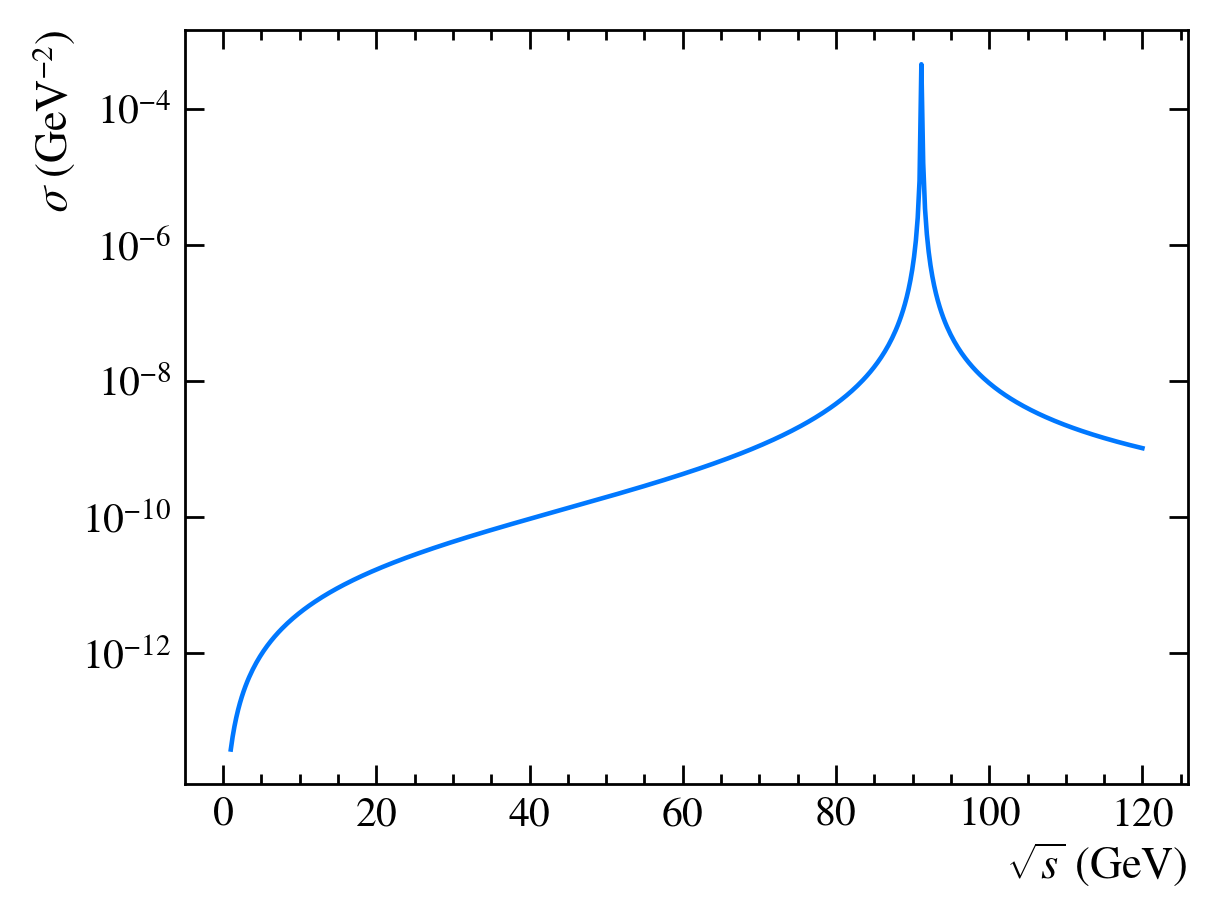

In [31]:
mZ, gZ = 91.18, 2.496 # in GeV 
gee, gmm = 0.084, 0.084 # in GeV
sqrts = np.linspace(1,120,500)
xsec = sigma_ee_mm(sqrts,mZ,gZ,gee,gmm)
plt.yscale('log')
plt.plot(sqrts,xsec)
plt.xlabel("$\sqrt{s}$ (GeV)")
plt.ylabel("$\sigma$ ($\mathrm{GeV}^{-2})$")

# Question 2 #
- Explain how we arrived at the values of the parameters "gee" and "gmm" given in the cell above
- The plot above shows the cross-section drop at around 1GeV. Is this effect physical? Explain your reasoning. 

# Question 3 #
- Which parameter would you modify in the expression of the cross section given above in order to describe the process $e^+e^- \to\mathrm{hadrons}$?
- Describe a step-by-step approach to determining the number of generations of neutrinos
    - You are given the measured values of $\sigma_{ee\to\mathrm{hadrons}}$ at a few $\sqrt{s}$ points (TODO)
    - You should use the expression of $\sigma_{ee\to\mathrm{hadrons}}$ 

## The cells below show an example of:## 
- How to generate some data according to the cross-section function shown above and - - - Plot a histogram of the generated values 
- Fit back the generated data to extract $m_{Z}$ and $\gamma_{Z}$

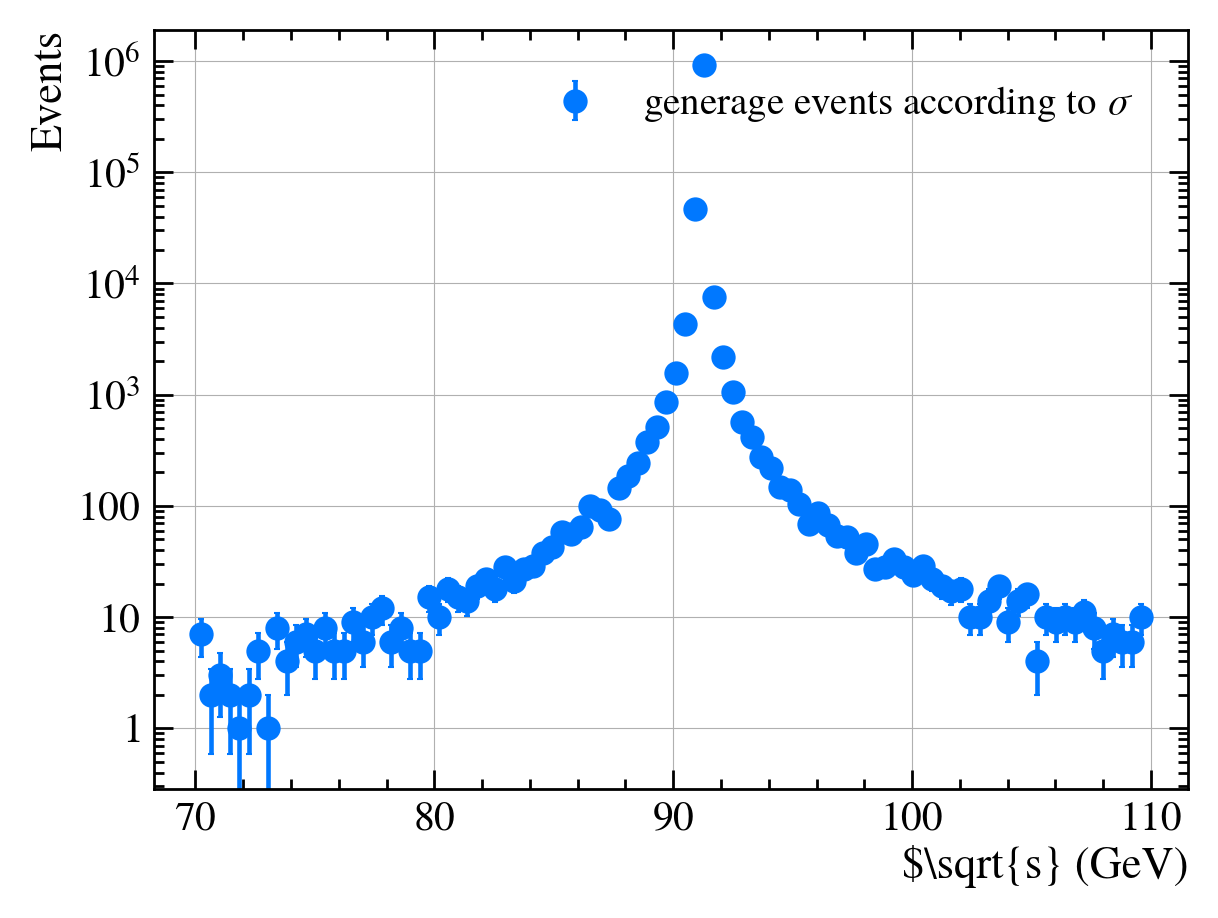

In [44]:
from scipy.integrate import quad
from scipy.interpolate import interp1d
def gen_data(n_events,sigma_ee_mm,sqrts_min,sqrts_max,mZ,gZ,gee,gmm):
    """
    Generate cross section as a function of energy using the CDF method
    """
    npoints=1000000    
    
    # Step 1: Create finely spaced energy grid
    sqrts_grid = np.linspace(sqrts_min, sqrts_max, npoints)
    sigma_vals = np.array([sigma_ee_mm(sqrts,mZ,gZ,gee,gmm) for sqrts in sqrts_grid])

    # Step 2: Create cumulative distribution function (CDF)
    cumulative = np.cumsum(sigma_vals)
    cumulative /= cumulative[-1]  # Normalize to [0,1]

    # Invert CDF
    inv_cdf = interp1d(cumulative, sqrts_grid, bounds_error=False, fill_value=(sqrts_min, sqrts_max))

    # Step 3: Sample from the inverted CDF
    random_probs = np.random.rand(n_events)
    sampled_energies = inv_cdf(random_probs)

    return sampled_energies


sqrts_min = 70
sqrts_max = 110
n_events = 1000000
sqrts_vals = gen_data(n_events,sigma_ee_mm,sqrts_min,sqrts_max,mZ,gZ,gee,gmm)

# Plot
hist, bin_edges = np.histogram(sqrts_vals, bins=100)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
errors = np.sqrt(hist)

fig, ax = plt.subplots()
ax.errorbar(
    bin_centers, hist,
    yerr=errors,
    fmt='o',               # Point markers
    label="generate events according to $\sigma$"
)
ax.set_xlabel("$\sqrt{s}$ (GeV)")
ax.set_ylabel("Events")
ax.legend()
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()




